### **Dataset Description:**
1. **country_or_reigon**: It is the name of the country whose data has been recorded.
2. **year**: It is the year in which the data has been recorded
3. **demand_mwh_per_capita**: It is the amount of demand generated per capita and is measured in megawatt per hour
4. **emissions_intensity_gco2_per_kwh**: It is the amount of CO2 emissions from power generation in the country, measured in megatonnes
5. **capacity_gw_solar**: It is the installed capacity of power generation from solar energy, measured in gigawatt
6. **capacity_gw_wind**: It is the installed capacity of power generation from wind energy, measured in gigawatt
7. **capacity_gw_bioenergy**: It is the installed capacity of power generation from bioenergy, measured in gigawatt
8. **capacity_gw_coal**: It is the installed capacity of power generation from coal, measured in gigawatt
9. **capacity_gw_hydro**: It is the installed capacity of power generation from hydro energy, measured in gigawatt
10. **capacity_gw_fossil**: It is the installed capacity of power generation from fossil energy, measured in gigawatt
11. **emissions_mtco2_solar**: It is the amount of CO2 emissions released during power generation from solar energy, measured in megatonnes.
12. **emissions_mtco2_wind**: It is the amount of CO2 emissions released during power generation from solar energy, measured in megatonnes.
13. **emissions_mtco2_bioenergy**: It is the amount of CO2 emissions released during power generation from bioenergy, measured in megatonnes.
14. **emissions_mtco2_coal**: It is the amount of CO2 emissions released during power generation from coal, measured in megatonnes.
15. **emissions_mtco2_hydro**: It is the amount of CO2 emissions released during power generation from hydro energy, measured in megatonnes.
16. **emissions_mtco2_fossil**: It is the amount of CO2 emissions released during power generation from fossil fuel, measured in megatonnes.
17. **generation_twh_solar**: It is the amount of power generated from solar energy measured in terwatt hours.
18. **generation_twh_wind**: It is the amount of power generated from wind energy measured in terwatt hours.
19. **generation_twh_bioenergy**: It is the amount of power generated from bioenergy measured in terwatt hours.
20. **generation_twh_coal**: It is the amount of power generated from coal measured in terwatt hours.
21. **generation_twh_hydro**: It is the amount of power generated from hydro energy measured in terwatt hours.
22. **generation_twh_fossil**: It is the amount of power generated from fossil measured in terwatt hours.


## **Variables Used For building the ML models**
**1. Dependant Variables:** demand_mwh_per_capita, emissions_intensity_gco2_per_kwh.

**2. Independant Variables:** capacity_gw_solar,capacity_gw_wind,
 capacity_gw_bioenergy,
 capacity_gw_coal,
 capacity_gw_hydro,
 capacity_gw_fossil,
 emissions_mtco2_wind,
 emissions_mtco2_solar,
 emissions_mtco2_bioenergy,
 emissions_mtco2_coal,
 emissions_mtco2_hydro,
 emissions_mtco2_fossil,
 generation_twh_wind,
 generation_twh_solar,
 generation_twh_bioenergy,
 generation_twh_coal,
 generation_twh_hydro,
 generation_twh_fossil


## **Tasks Performed in Project**

---



---



---


1. Import the required libraries for the assignment
2. Load the Dataset into pandas dataframe
3. Check the shape of the imported data (number of rows and columns)
4. Generate the Dataset report using Pandas Profiling.
5. **Data Preprocessing**
  *   Check for empty and missing values

  *   Fill empty values using **nearest neighbor imputation**
  *   Displaying statistical description of the numerical columns in the dataframe.
6. **Exploratory Data Analysis (EDA)**
     

*   Used Box Plots for knowing the distribution of the data, including its central tendency, variability, and outliers.
*   used histograms for providing a visual representation of the frequencies of observations falling within specific intervals, or "bins," of the data.


*   Using Heatmap to visualize the Co-relation between different variables
*   Useing Stacked plots which are used to visually represent the composition and changes in composition of different categories over time or across different groups.


*   Use a scatter plot to determine whether or not two variables have a relationship or correlation.







7. **Modeling**

   *   Performed ***Linear Regression*** to predict the values of "demand_mwh_per_capita"
   *   Performed ***Linear Regression*** to predict the values of "emission_intensity_gco2_per_kwh".
   *   Building a ***decision tree*** for predicting and classifying the "demand_mwh_per_capita" as low, average or high
   *   Building a ***decision tree*** for predicting and classifying the "emission_intensity_gco2_per_kwh" as Low, Medium or High.
8. Evaluating the built models using MSE, MAE and R squared value




## **Questions answered in the Project**
1. Are there any empty/NA values in the dataset ?
2. What is the distribution followed by all the columns/features in the dataset ?
3. Are there any outliers present in the dataset ?
4. What is the correlation between the independant and dependant features in the dataset ?
5. How can we predict the demand met depending upon the installed capacity, actual generation and emissions from generation of power using various energy sources ?
6. How can we predict the total CO2 emissions released depending upon the installed capacity, actual generation and emissions from generation of power using various energy sources ?
7. How can we predict and classify whether the amount of demand met is low, average or high ?
8. How can we predict and classify whether the amount of emissions generated is low, average or high ?

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import copy
import re
# import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import KNNImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import datasets, linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import plotly.subplots as sp


## **Reading the csv file using pandas.**






In [ ]:
df=pd.read_csv("/content/ML Dataset (1).csv")

## **Displaying first 5 rows.**

In [ ]:
df.head()

,country_or_region,year,demand_mwh_per_capita,emissions_intensity_gco2_per_kwh,capacity_gw_solar,capacity_gw_wind,capacity_gw_bioenergy,capacity_gw_coal,capacity_gw_hydro,capacity_gw_fossil,...,emissions_mtco2_bioenergy,emissions_mtco2_coal,emissions_mtco2_hydro,emissions_mtco2_fossil,generation_twh_wind,generation_twh_solar,generation_twh_bioenergy,generation_twh_coal,generation_twh_hydro,generation_twh_fossil
0,Brazil,2000,2.192,86.608,0.0,0.02,2.66,1.37,61.06,4.36,...,1.70,8.74,7.23,20.68,0.00,0.0,7.41,10.66,301.36,28.87
1,Brazil,2001,2.026,100.412,0.0,0.02,2.66,1.37,62.41,6.38,...,1.95,8.90,6.36,23.97,0.04,0.0,8.47,10.85,265.20,35.19
2,Brazil,2002,2.088,91.863,0.0,0.02,2.67,1.37,64.47,8.30,...,2.22,7.39,6.80,22.07,0.06,0.0,9.66,9.01,283.23,33.50
3,Brazil,2003,2.174,85.316,0.0,0.02,2.70,1.37,67.70,9.55,...,2.59,7.35,7.26,20.61,0.06,0.0,11.26,8.96,302.56,31.62
4,Brazil,2004,2.266,94.420,0.0,0.02,3.12,1.37,69.09,12.87,...,2.71,8.45,7.62,25.52,0.06,0.0,11.78,10.30,317.59,40.14


## **Checking the shape of the dataframe**

In [ ]:
df.shape

(133, 22)

# **Pre-processing the Dataset for modelling**
Below mentioned are the steps followed to preprocess the imported data

### **Step 1: Generating a list of column names to use for preprocessing, EDA and modeling the dataset**

In [ ]:
cols=df.columns.values.tolist()
cols.remove('country_or_region')
cols.remove('year')
cols

['demand_mwh_per_capita',
 'emissions_intensity_gco2_per_kwh',
 'capacity_gw_solar',
 'capacity_gw_wind',
 'capacity_gw_bioenergy',
 'capacity_gw_coal',
 'capacity_gw_hydro',
 'capacity_gw_fossil',
 'emissions_mtco2_wind',
 'emissions_mtco2_solar',
 'emissions_mtco2_bioenergy',
 'emissions_mtco2_coal',
 'emissions_mtco2_hydro',
 'emissions_mtco2_fossil',
 'generation_twh_wind',
 'generation_twh_solar',
 'generation_twh_bioenergy',
 'generation_twh_coal',
 'generation_twh_hydro',
 'generation_twh_fossil']

### **Step 2: Checking for null values, if any.**

In [ ]:
df.isnull().values.any()

True

**There are Null values present in the dataframe, therefore we must replace these null values with other appropriate values**

### **Step 3: Counting the number of null value in each column in the dataframe**

In [ ]:
count_nan = df.isnull().sum()
print(count_nan)

country_or_region                   0
year                                0
demand_mwh_per_capita               0
emissions_intensity_gco2_per_kwh    0
capacity_gw_solar                   1
capacity_gw_wind                    1
capacity_gw_bioenergy               1
capacity_gw_coal                    1
capacity_gw_hydro                   1
capacity_gw_fossil                  1
emissions_mtco2_wind                0
emissions_mtco2_solar               0
emissions_mtco2_bioenergy           0
emissions_mtco2_coal                0
emissions_mtco2_hydro               0
emissions_mtco2_fossil              0
generation_twh_wind                 0
generation_twh_solar                0
generation_twh_bioenergy            0
generation_twh_coal                 0
generation_twh_hydro                0
generation_twh_fossil               0
dtype: int64


**A few of the rows have 1 null value each. To impute the missing values in dataset, KNNImputer has been used.**

##**Step 4: Applying K-Nearest Neighbour Imputation**

We are using KNNImputer() from scikit-learn library to perform nearest neighbor imputation.The o:
1. **n_neighbors = 3** : The no. of neighbors to be considered in nearest neighbor imputation has been set to 3 as we only want to consider the nearest neighbors for imputing the missing values.
2. **weights="distance"** : The neighbors have been given weights as inverse of the distance from the point whose value is to be imputed.









In [ ]:
imputer = KNNImputer(n_neighbors=3, weights="distance")
imputer.fit(df[cols])
newVal=imputer.transform(df[cols])

## **Step 5: Creating a new dataframe named "newDf" to include the new imputed values in the dataframe**

In [ ]:
newDf=pd.DataFrame(newVal, columns = cols)
newDf['country_or_region']=df['country_or_region']
newDf['year']=df['year']

## **Step 6: Displaying first 5 rows of the new dataframe.**

In [ ]:
newDf.head()

,demand_mwh_per_capita,emissions_intensity_gco2_per_kwh,capacity_gw_solar,capacity_gw_wind,capacity_gw_bioenergy,capacity_gw_coal,capacity_gw_hydro,capacity_gw_fossil,emissions_mtco2_wind,emissions_mtco2_solar,...,emissions_mtco2_hydro,emissions_mtco2_fossil,generation_twh_wind,generation_twh_solar,generation_twh_bioenergy,generation_twh_coal,generation_twh_hydro,generation_twh_fossil,country_or_region,year
0,2.192,86.608,0.0,0.02,2.66,1.37,61.06,4.36,0.0,0.0,...,7.23,20.68,0.00,0.0,7.41,10.66,301.36,28.87,Brazil,2000
1,2.026,100.412,0.0,0.02,2.66,1.37,62.41,6.38,0.0,0.0,...,6.36,23.97,0.04,0.0,8.47,10.85,265.20,35.19,Brazil,2001
2,2.088,91.863,0.0,0.02,2.67,1.37,64.47,8.30,0.0,0.0,...,6.80,22.07,0.06,0.0,9.66,9.01,283.23,33.50,Brazil,2002
3,2.174,85.316,0.0,0.02,2.70,1.37,67.70,9.55,0.0,0.0,...,7.26,20.61,0.06,0.0,11.26,8.96,302.56,31.62,Brazil,2003
4,2.266,94.420,0.0,0.02,3.12,1.37,69.09,12.87,0.0,0.0,...,7.62,25.52,0.06,0.0,11.78,10.30,317.59,40.14,Brazil,2004


## **Step 7: Checking if the Null values have been removed or not in the new dataframe**

In [ ]:
newDf.isnull().values.any()

False

## **Step 8: Converting the unit of columns measuring capacity from gigawatt hours to terrawatt hours**

In [ ]:
for i in ('capacity_gw_solar','capacity_gw_wind','capacity_gw_bioenergy','capacity_gw_coal','capacity_gw_hydro','capacity_gw_fossil'):
  df[i] = df[i] * 0.001


# **Exploratory Data Analysis**
Below mentioned are the steps followed to conduct an exploratory data analysis on the imported data



## **Step 1: Describing the numerical columns of the dataframe**

In [ ]:
newDf.describe()

,demand_mwh_per_capita,emissions_intensity_gco2_per_kwh,capacity_gw_solar,capacity_gw_wind,capacity_gw_bioenergy,capacity_gw_coal,capacity_gw_hydro,capacity_gw_fossil,emissions_mtco2_wind,emissions_mtco2_solar,...,emissions_mtco2_coal,emissions_mtco2_hydro,emissions_mtco2_fossil,generation_twh_wind,generation_twh_solar,generation_twh_bioenergy,generation_twh_coal,generation_twh_hydro,generation_twh_fossil,year
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.00000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,5.837857,465.751263,22.046547,31.524178,5.699970,195.074530,73.271392,309.999763,0.706617,1.18203,...,834.931880,6.381579,1001.197594,64.268045,24.628271,33.715489,1018.209248,265.904211,1338.910677,2010.586466
std,4.143243,179.859571,45.431806,52.020728,4.460956,255.256046,77.795901,335.039979,1.171292,2.41841,...,1026.009513,7.056139,1072.665811,106.471037,50.385334,26.091138,1251.231555,294.008859,1370.102377,6.422177
min,0.541000,83.764000,0.000000,0.020000,0.350000,1.370000,4.830000,4.360000,0.000000,0.00000,...,7.350000,0.420000,20.610000,0.000000,0.000000,1.690000,8.960000,17.450000,28.870000,2000.000000
25%,2.266000,416.785000,0.130000,2.200000,1.690000,43.002537,27.730000,73.910000,0.040000,0.00000,...,208.280000,1.900000,277.740000,4.020000,0.080000,14.710000,254.000000,79.040000,372.640000,2005.000000
50%,6.579000,494.031000,2.090000,11.330000,4.600000,52.670000,46.780000,146.610000,0.210000,0.10000,...,280.210000,3.930000,490.750000,19.460000,2.020000,28.020000,341.720000,163.710000,716.670000,2011.000000
75%,7.896000,625.696000,34.080000,38.560000,9.030000,286.620000,83.620000,613.640000,0.750000,1.67000,...,1241.510000,8.290000,1692.330000,68.090000,34.800000,50.930000,1514.040000,345.320000,2588.210000,2016.000000
max,13.787000,679.410000,306.970000,328.970000,18.730000,1068.710000,354.530000,1174.130000,7.210000,15.70000,...,4378.090000,31.720000,4520.240000,655.600000,327.000000,169.930000,5339.140000,1321.710000,5623.990000,2022.000000


## **Step 2: Plotting the boxplots for the numerical columns in the dataframe**
This code creates a grid of subplots, where each subplot displays a boxplot for a different variable in the dataset newDf.






In [ ]:
fig = make_subplots(rows=10, cols=2)
i=0
r=1
col=1
while((i<20)and(r<=10)):
    fig.add_trace(
        go.Box(x=newDf[cols[i]],showlegend=False,name=cols[i]),
        row=r, col=1
    )
    fig.add_trace(
        go.Box(x=newDf[cols[i+1]],showlegend=False,name=cols[i+1]),
        row=r, col=2
    )
    i+=2
    r+=1

fig.update_layout(height=800, width=2500, title_text="Boxplots for numerical columns")
fig.show()

### **The boxplots shown above highlight the distribution of the numerical columns in the dataframe and it also highlights the number of outliers present in the numerical columns**



## **Step 3: Plotting the histograms of the numerical columns in the dataset**
This code will create a figure with 10 rows and 2 columns, each containing a histogram of the data in the corresponding column of the df DataFrame, using the plotly library. The nbinsx parameter sets the number of bins in each histogram, and the histnorm parameter sets the normalization mode for the histogram (in this case, it's set to 'probability density').




In [ ]:
fig = sp.make_subplots(rows=10, cols=2, vertical_spacing=0.05) # adjust the spacing here

for i, colName in enumerate(cols):
    row = (i // 2) + 1
    col = (i % 2) + 1
    fig.add_trace(go.Histogram(x=df[colName], nbinsx=30, histnorm='probability density', name=colName), row=row, col=col)

fig.update_layout(height=1500, width=1000, title_text="Histogram Plots for DataFrame Columns")
fig.show()


###**It can be noticed from the above plots that most of the numerical columns, namely 'demand_mwh_per_capita' and 'emissions_intensity_gco2_per_kwh' do not seems to follow any distribution.The other remaining columns are observed to be left skewed**

## **Step 4: Plotting a correlation matrix to check the correlation of the numerical columns in the dataframe**
The corr() method calculates the correlation coefficient between all pairs of numeric columns in the DataFrame, and returns a new DataFrame object where the rows and columns represent the original columns in df, and the values represent the correlation coefficients between the corresponding columns.

In [ ]:
corr = df.corr()
corr.head()

<ipython-input-18-954b35a92bf3>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,year,demand_mwh_per_capita,emissions_intensity_gco2_per_kwh,capacity_gw_solar,capacity_gw_wind,capacity_gw_bioenergy,capacity_gw_coal,capacity_gw_hydro,capacity_gw_fossil,emissions_mtco2_wind,...,emissions_mtco2_bioenergy,emissions_mtco2_coal,emissions_mtco2_hydro,emissions_mtco2_fossil,generation_twh_wind,generation_twh_solar,generation_twh_bioenergy,generation_twh_coal,generation_twh_hydro,generation_twh_fossil
year,1.000000,0.062809,-0.070403,0.563260,0.530208,0.661286,0.215504,0.258999,0.237117,0.555759,...,0.611128,0.154053,0.231847,0.174766,0.555688,0.591530,0.611039,0.154054,0.231827,0.189098
demand_mwh_per_capita,0.062809,1.000000,-0.032351,0.111599,0.162190,0.214661,0.087972,-0.098207,0.475252,0.259962,...,0.439530,0.083114,-0.140931,0.235397,0.259949,0.157848,0.439577,0.083114,-0.140906,0.317868
emissions_intensity_gco2_per_kwh,-0.070403,-0.032351,1.000000,0.109267,0.139909,-0.339853,0.440044,0.101742,0.358049,0.071391,...,-0.090926,0.482589,0.023279,0.470790,0.071397,0.087410,-0.090949,0.482589,0.023265,0.454020
capacity_gw_solar,0.563260,0.111599,0.109267,1.000000,0.896783,0.419264,0.586383,0.567319,0.498863,0.854167,...,0.770191,0.542391,0.562588,0.540930,0.854343,0.979073,0.770150,0.542391,0.562593,0.533282
capacity_gw_wind,0.530208,0.162190,0.139909,0.896783,1.000000,0.525896,0.748460,0.706841,0.694645,0.970988,...,0.818953,0.694460,0.692586,0.706662,0.971054,0.886875,0.818937,0.694460,0.692599,0.705890


## **Step 5: Plotting a heatmap to better understand and visualise the correlation of various columns in the dataset**
px.imshow(corr, text_auto="0.2f", aspect="auto",width=1000, height=1000) creates the heatmap itself. corr is likely a correlation matrix or similar data structure that will be visualized as a heatmap. The text_auto parameter mentions till which decimal point the correlation value is to be shown.

<!-- The cmap parameter specifies the color map to be used, with crest likely being a specific color palette. annot=True specifies that the values of each cell in the heatmap will be annotated with their corresponding values. -->

In [ ]:
plt.figure(figsize=(30,30))
fig = px.imshow(corr, text_auto="0.2f", aspect="auto",width=1000, height=1000)
fig.show()
# sns.heatmap(corr, cmap="crest",annot=True)

<Figure size 3000x3000 with 0 Axes>

## **Step 6: Plotting the heatmap only for the target features of the dataset**
The code is visualizing the relationship between the two variables in the demands dataframe using a heatmap. The color of each cell in the heatmap represents the value of the corresponding cell in the demands dataframe, and the numeric values in each cell provide additional information.

In [ ]:
demands=corr[['demand_mwh_per_capita','emissions_intensity_gco2_per_kwh']]
plt.figure(figsize=(10,15))
# sns.heatmap(demands, cmap="crest",annot=True)
fig = px.imshow(demands, text_auto="0.2f", aspect="auto",width=1000, height=1000)
fig.show()

<Figure size 1000x1500 with 0 Axes>

## **Step 8: Plotting stacked plot for all numerical features in the dataset**
The code defines an empty list called "traces".
It loops through each column name in the "cols" list and creates a new Bar trace using the go.Bar() function from plotly.
Each trace is appended to the "traces" list.
After all traces have been created, a new Figure object is created using the go.Figure() function and passing the "traces" list as the data parameter.
The barmode parameter is set to 'stack' to make the bars stacked on top of each other.
The title of the chart is set to 'Stacked Bar Chart'.

In [ ]:
traces = []
for col in cols:
    traces.append(go.Bar(x=df.index, y=df[col], name=col))

# Create the stacked bar chart
fig = go.Figure(data=traces)
fig.update_layout(barmode='stack', title='Stacked Bar Chart')
fig.show(renderer='colab')

## **Step 7: Plotting a scatter plot for all numerical features in the dataset**
The code loops through each variable in the "cols" list twice, and creates a new Scatter trace using the go.Scatter() function from plotly for each combination of variables. The trace is added to the corresponding subplot using the add_trace() function, with the row and column indices calculated from the loop counters.

In [ ]:
colwidth = [0.5] * len(cols)
rowwidth = [0.5] * len(cols)
fig = make_subplots(rows=len(cols), cols=len(cols),
                    subplot_titles=[f"<span style='font-size: 10px'>{var1} vs {var2}</span>" for var2 in cols for var1 in cols])

for i, var1 in enumerate(cols):
    for j, var2 in enumerate(cols):
        fig.add_trace(go.Scatter(x=df[var1], y=df[var2], mode='markers'), row=i+1, col=j+1)

fig.update_layout(height=6000, width=6000, showlegend=False, hovermode='closest',
                  title='Bivariate Scatter Plots of Selected Variables')

fig.show(renderer='colab')

## **Linear Regression Model for demand_mwh_per_capita**
Below mentioned are the steps for followed to predict the amount of demand met on the basis of installed capacity and actual generation of power from different sources

### **Step 1: Making the dataframe for analysis/prediction of demand in MwH per capita**

In [ ]:
Demand_cols = copy.deepcopy(cols)
Demand_cols.remove('emissions_intensity_gco2_per_kwh')
df1 = newDf[Demand_cols]
df1.head()

,demand_mwh_per_capita,capacity_gw_solar,capacity_gw_wind,capacity_gw_bioenergy,capacity_gw_coal,capacity_gw_hydro,capacity_gw_fossil,emissions_mtco2_wind,emissions_mtco2_solar,emissions_mtco2_bioenergy,emissions_mtco2_coal,emissions_mtco2_hydro,emissions_mtco2_fossil,generation_twh_wind,generation_twh_solar,generation_twh_bioenergy,generation_twh_coal,generation_twh_hydro,generation_twh_fossil
0,2.192,0.0,0.02,2.66,1.37,61.06,4.36,0.0,0.0,1.70,8.74,7.23,20.68,0.00,0.0,7.41,10.66,301.36,28.87
1,2.026,0.0,0.02,2.66,1.37,62.41,6.38,0.0,0.0,1.95,8.90,6.36,23.97,0.04,0.0,8.47,10.85,265.20,35.19
2,2.088,0.0,0.02,2.67,1.37,64.47,8.30,0.0,0.0,2.22,7.39,6.80,22.07,0.06,0.0,9.66,9.01,283.23,33.50
3,2.174,0.0,0.02,2.70,1.37,67.70,9.55,0.0,0.0,2.59,7.35,7.26,20.61,0.06,0.0,11.26,8.96,302.56,31.62
4,2.266,0.0,0.02,3.12,1.37,69.09,12.87,0.0,0.0,2.71,8.45,7.62,25.52,0.06,0.0,11.78,10.30,317.59,40.14


 ### **Step 2: Checking for heteroscedasticity or homoscedasticity in the dataset**
### Homoscedasticity/Heteroscedasticity Experiment
1. No heterosedacity is as such visible in the scatter plots where the dependent variable is **demand_mwh_per_capita** and all other columns are independent columns.
2. From this we can infer that we can apply **linear regression** once because our **target varible** is a continuous **numeric value** and we can also check how **strong is the relationship among variables**.

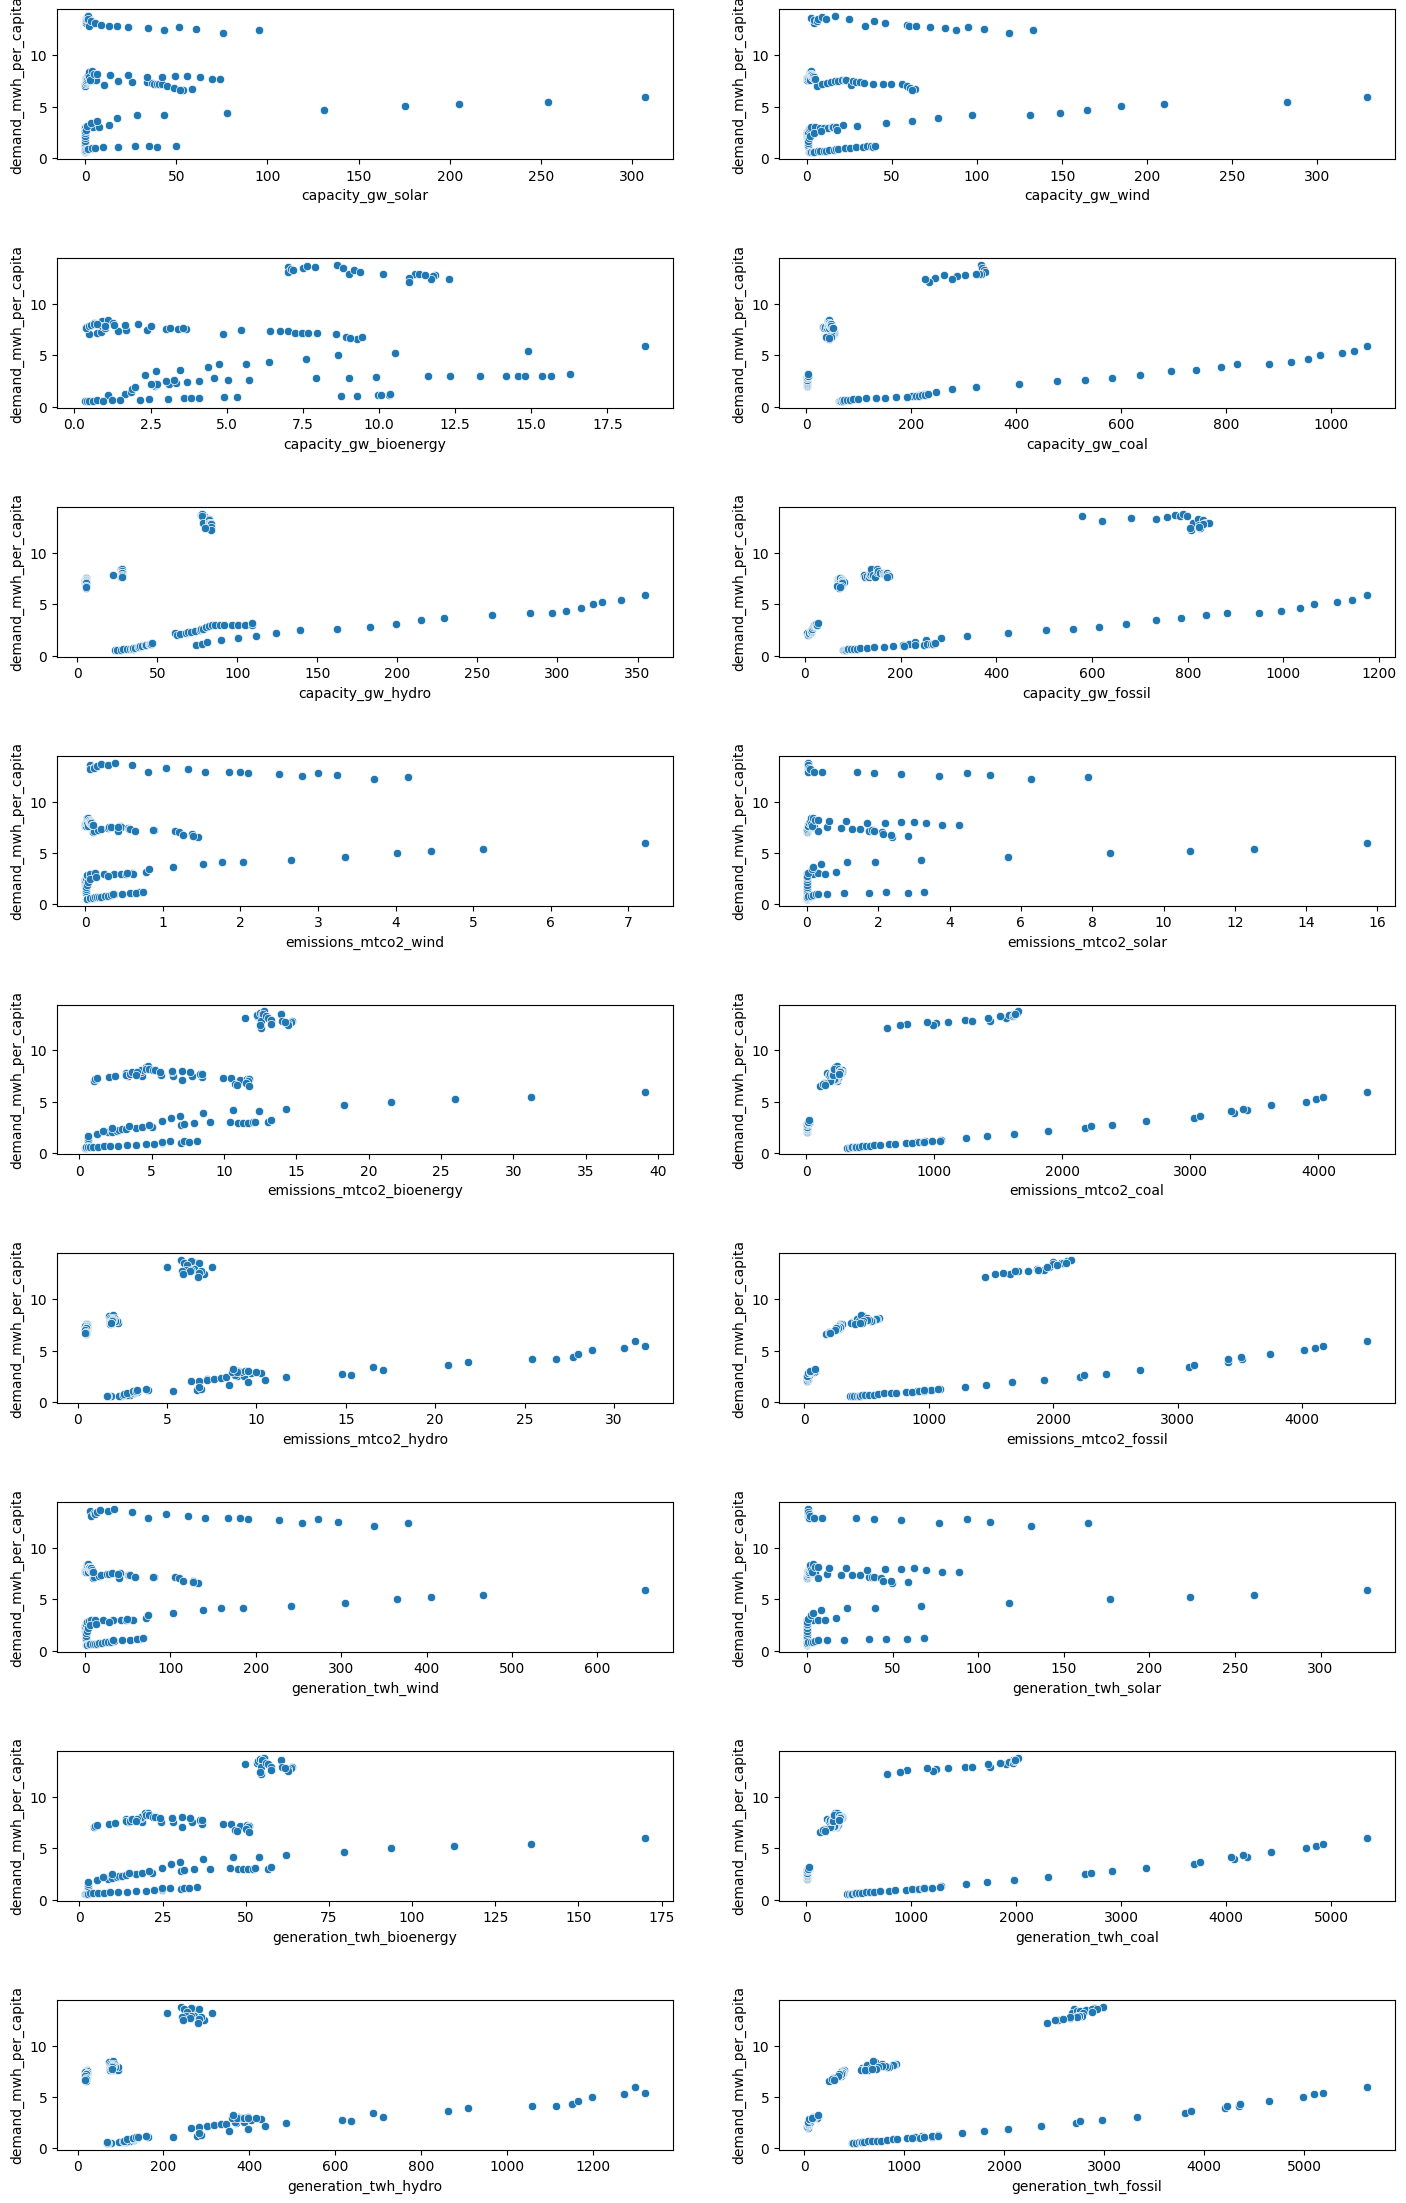

In [ ]:
plt.figure(figsize=(15,25))
Demand_cols.remove('demand_mwh_per_capita')
for i,colName in enumerate(Demand_cols):
  plt.subplot(10,2,i+1)
  sns.scatterplot(data=df1,x=colName,y='demand_mwh_per_capita')
plt.tight_layout(pad=4.0)

### **Step 3: Splitting the data into training data(75%) and testing data(25%) for building and evaluating the linear regression model**

In [ ]:
Ycols = copy.deepcopy(cols)
features=newDf[Ycols]
target=newDf['demand_mwh_per_capita']
features = features.drop(['demand_mwh_per_capita','emissions_intensity_gco2_per_kwh','emissions_mtco2_wind','emissions_mtco2_solar','emissions_mtco2_bioenergy','emissions_mtco2_coal','emissions_mtco2_hydro','emissions_mtco2_fossil'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, train_size = .75)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

### **Step 4: Testing and Evaluating the linear regression model using Mean squared error, Mean absolute error and R squared value**

In [ ]:
y_pred = regr.predict(X_test)
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.7f" % r2_score(y_test, y_pred))

Coefficients: 
 [-0.01533095 -0.05123876 -0.56528694  0.01741346 -0.06451065 -0.00392328
  0.01444673 -0.01796242  0.21589775 -0.0088266   0.00961105  0.00717883]
Mean squared error: 1.36
Mean absolute error: 0.81
Coefficient of determination: 0.8941122


### **The R squared value is 0.7878251 which shows that the linear regression performs fairly well on the testing dataset**

# **Linear Regression Model for emission_intensity_gco2_per_kwh**
Below mentioned are the steps followed to predict the amount of total emissions released using emissions from released during generation of power from other sources

### **Step 1: Making the dataframe for analysis/prediction of emmision intensity of CO2 per KwH**

In [ ]:
Emmision_cols = copy.deepcopy(cols)
Emmision_cols.remove('demand_mwh_per_capita')
df2 = newDf[Emmision_cols]
df2.head()

,emissions_intensity_gco2_per_kwh,capacity_gw_solar,capacity_gw_wind,capacity_gw_bioenergy,capacity_gw_coal,capacity_gw_hydro,capacity_gw_fossil,emissions_mtco2_wind,emissions_mtco2_solar,emissions_mtco2_bioenergy,emissions_mtco2_coal,emissions_mtco2_hydro,emissions_mtco2_fossil,generation_twh_wind,generation_twh_solar,generation_twh_bioenergy,generation_twh_coal,generation_twh_hydro,generation_twh_fossil
0,86.608,0.0,0.02,2.66,1.37,61.06,4.36,0.0,0.0,1.70,8.74,7.23,20.68,0.00,0.0,7.41,10.66,301.36,28.87
1,100.412,0.0,0.02,2.66,1.37,62.41,6.38,0.0,0.0,1.95,8.90,6.36,23.97,0.04,0.0,8.47,10.85,265.20,35.19
2,91.863,0.0,0.02,2.67,1.37,64.47,8.30,0.0,0.0,2.22,7.39,6.80,22.07,0.06,0.0,9.66,9.01,283.23,33.50
3,85.316,0.0,0.02,2.70,1.37,67.70,9.55,0.0,0.0,2.59,7.35,7.26,20.61,0.06,0.0,11.26,8.96,302.56,31.62
4,94.420,0.0,0.02,3.12,1.37,69.09,12.87,0.0,0.0,2.71,8.45,7.62,25.52,0.06,0.0,11.78,10.30,317.59,40.14


### **Step 2: Checking for heteroscedasticity or homoscedasticity in the dataset**
### Homoscedasticity/Heteroscedasticity Experiment
1. No heterosedacity is as such visible in the scatter plots where the dependent variable is **emissions_intensity_gco2_per_kwh** and all other columns are independent columns.
2. From this we can infer that we can apply **linear regression** once because our **target varible** is a continuous **numeric value** and we can also check how **strong is the relationship among variables**.

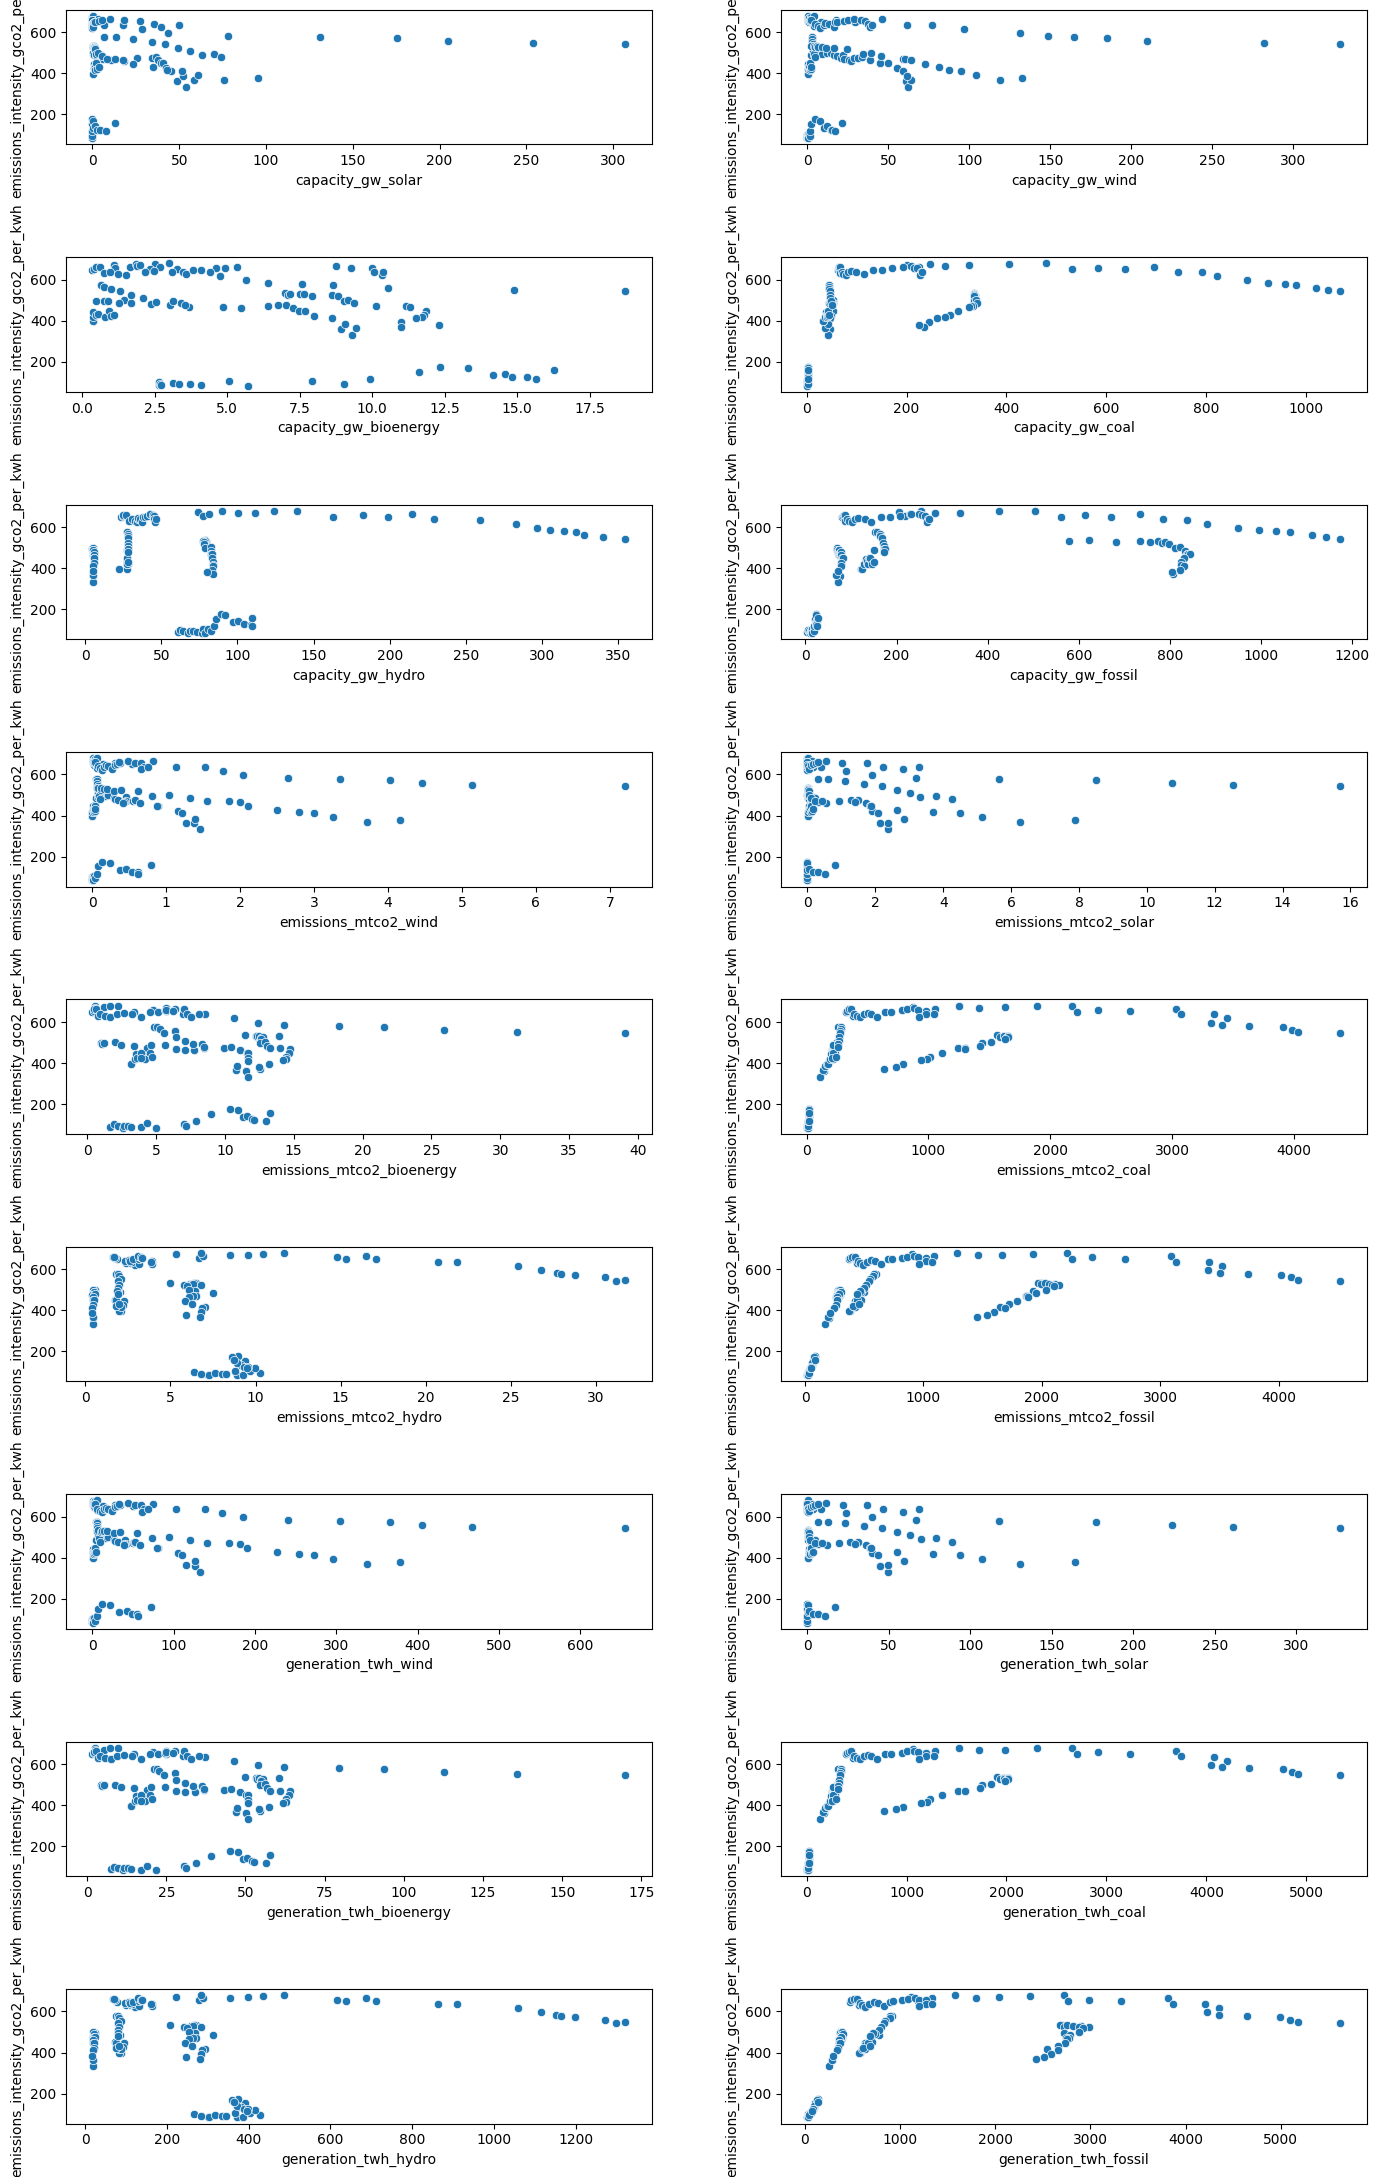

In [ ]:
plt.figure(figsize=(15,25))
Emmision_cols.remove('emissions_intensity_gco2_per_kwh')
for i,colName in enumerate(Demand_cols):
  plt.subplot(10,2,i+1)
  sns.scatterplot(data=df2,x=colName,y='emissions_intensity_gco2_per_kwh')
plt.tight_layout(pad=5.0)

### **Step 3: Creating a list of column names to be used as features for creating the linear regression model**

In [ ]:
Xcols_emissions = []
for i in cols:
    if(re.match('^emissions',i)):
        Xcols_emissions.append(i)

### **Step 4: Splitting the data into training data(75%) and testing data(25%) for building and evaluating the linear regression model**

In [ ]:
features=newDf[Xcols_emissions]
target=newDf['emissions_intensity_gco2_per_kwh']
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, train_size = .75)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

### **Step 5: Testing and Evaluating the linear regression model using Mean squared error, Mean absolute error and R squared value**





In [ ]:
y_pred = regr.predict(X_test)
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R squared value is: %.7f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.00000000e+00  1.68596533e-14 -6.27766943e-15 -1.31889938e-16
 -2.38089500e-17  4.81123202e-16  9.68727471e-17]
Mean squared error: 0.00
Mean absolute error: 0.00
R squared value is: 1.0000000


### **The R squared value is 1.000 which shows that the linear regression is perfectly fitting on the testing dataset. The linear regression also has mean absolute error and mean squared error as 0**

# **Modeling a Decision Tree for "demand_mwh_per_capita"**
Below mentioned are the steps followed to build a decision tree for predicting and categorizing the demand as low, average or high.

### **Step 1: Categorizing the "demand_mwh_per_capita" coloumn into three distinct categories: Low, Average and High**
This categorization has been done using **KBinsDiscretizer()** function described in scikit-learn library.The parameters given to the function are:


1.   n_bins = 3 : For creating three categories for demand_mwh_per_capita, namely low(0), average(1) and high(2)
2.   encode = "ordinal" : For utilizing the categories for decision tree model for classification, the categories are returned as integer values: {0,1,2}
3.   strategy = "kmeans" : This strategy was chosen because it ensures that the points grouped in a category have similar values

After fitting the KBinsDiscretizer, the result has been stored in a new list of integer values ranging from [0,2]


In [ ]:
bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
Demand_2D = newDf['demand_mwh_per_capita'][:, None]
bins.fit(Demand_2D)
DemandClasses=bins.fit_transform(Demand_2D)
Demand_Category=[]
for i in DemandClasses:
    if(i[0]==0.0):
        Demand_Category.append(0)
    elif(i[0]==1.0):
        Demand_Category.append(1)
    elif(i[0]==2.0):
        Demand_Category.append(2)


<ipython-input-32-3c281ae5a6b5>:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



### **Step 2: Adding the Demand Categories as a column in the dataframe**








In [ ]:
newDf['Demand Classes']=Demand_Category
newDf.head()

,demand_mwh_per_capita,emissions_intensity_gco2_per_kwh,capacity_gw_solar,capacity_gw_wind,capacity_gw_bioenergy,capacity_gw_coal,capacity_gw_hydro,capacity_gw_fossil,emissions_mtco2_wind,emissions_mtco2_solar,...,emissions_mtco2_fossil,generation_twh_wind,generation_twh_solar,generation_twh_bioenergy,generation_twh_coal,generation_twh_hydro,generation_twh_fossil,country_or_region,year,Demand Classes
0,2.192,86.608,0.0,0.02,2.66,1.37,61.06,4.36,0.0,0.0,...,20.68,0.00,0.0,7.41,10.66,301.36,28.87,Brazil,2000,0
1,2.026,100.412,0.0,0.02,2.66,1.37,62.41,6.38,0.0,0.0,...,23.97,0.04,0.0,8.47,10.85,265.20,35.19,Brazil,2001,0
2,2.088,91.863,0.0,0.02,2.67,1.37,64.47,8.30,0.0,0.0,...,22.07,0.06,0.0,9.66,9.01,283.23,33.50,Brazil,2002,0
3,2.174,85.316,0.0,0.02,2.70,1.37,67.70,9.55,0.0,0.0,...,20.61,0.06,0.0,11.26,8.96,302.56,31.62,Brazil,2003,0
4,2.266,94.420,0.0,0.02,3.12,1.37,69.09,12.87,0.0,0.0,...,25.52,0.06,0.0,11.78,10.30,317.59,40.14,Brazil,2004,0


### **Step 3: Creating a list of coloumn names containing the independant column names to be used for decision tree**

In [ ]:
Xcols = []
for i in cols:
    if(re.match('^capacity',i)):
        Xcols.append(i)
    elif(re.match('^generation',i)):
        Xcols.append(i)

### **Step 4: Creating seperate dataframes containing the features/independant variables and the target/dependant variables to be used for building the decision tree**


In [ ]:
features=newDf[Xcols]
target=newDf['Demand Classes']

### **Step 5: Splitting the data into training data(75%) and testing data(25%) for building and evaluating the decision tree**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, train_size = .75)

### **Step 6: Building the decision tree and fitting it on the training data**
Here the final decision tree has been given max depth of 3 as at that depth the decision tree gave the maximum accuracy based on the R squared value

In [ ]:
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### **Step 7: Testing and Evaluating the decision tree using Mean squared error, Mean absolute error and R squared value**

In [ ]:
y_pred_tree = clf.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_tree))
# The coefficient of determination: 1 is perfect prediction
print("R squared Value %.7f" % r2_score(y_test, y_pred_tree))
# The mean absolute error
print("Mean Absolute Error %.2f" % mean_absolute_error(y_test, y_pred_tree))

Mean squared error: 0.03
R squared Value 0.9291667
Mean Absolute Error 0.03


### **The R squared value is 0.929 which shows that the decision tree performs fairly well on the testing dataset**

### **Step 8: Visualising the regression tree graphically**

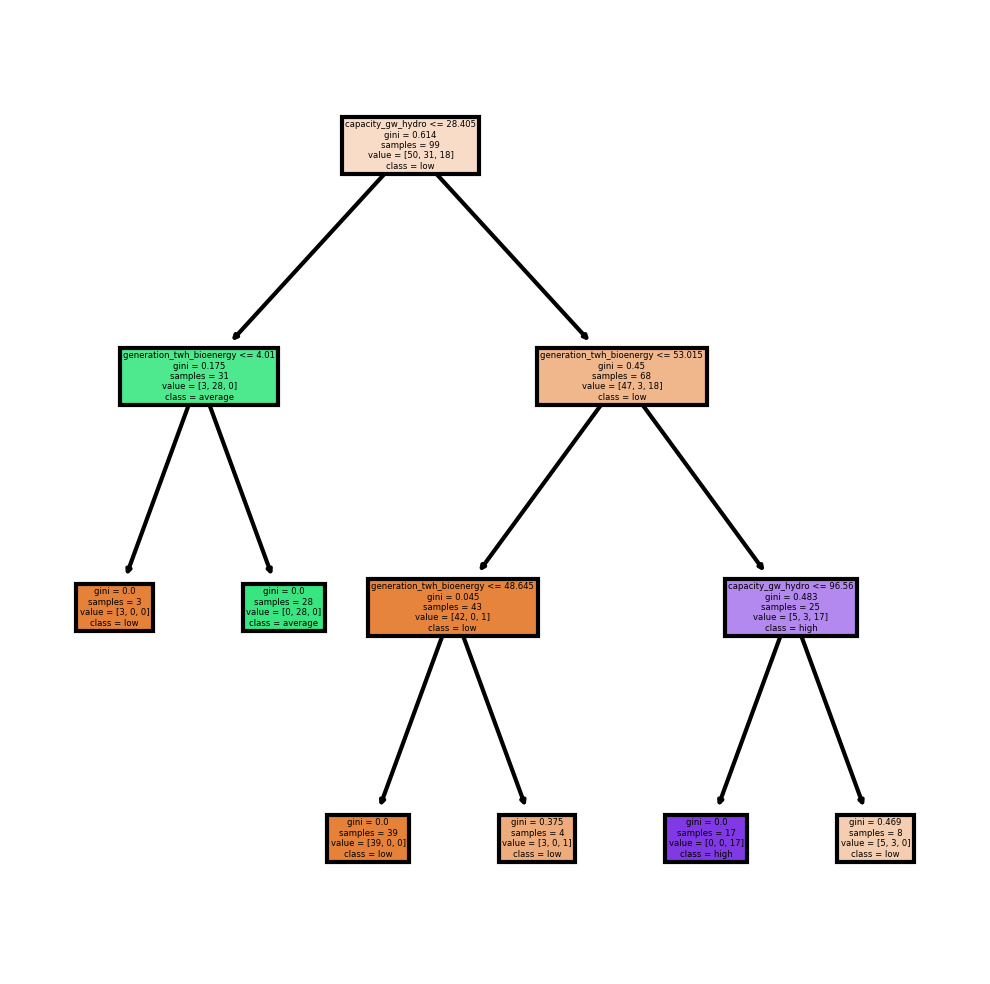

In [ ]:
DemandClasses=['low','average','high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = Xcols, class_names=DemandClasses,filled=True);

# **Modelling a Decision Tree for "emission_intensity_gco2_per_kwh"**
Below mentioned are the steps followed to build a decision tree for categorizing the emissions as low, medium and high.

### **Step 1: Categorizing the "	emissions_intensity_gco2_per_kwh	" coloumn into three distinct categories: Low, Average and High**
This categorization has been done using **KBinsDiscretizer()** function described in scikit-learn library.The parameters given to the function are:


1.   n_bins = 3 : For creating three categories for demand_mwh_per_capita, namely low(0), medium(1) and high(2)
2.   encode = "ordinal" : For utilizing the categories for decision tree model for classification, the categories are returned as integer values: {0,1,2}
3.   strategy = "kmeans" : This strategy was chosen because it ensures that the points grouped in a category have similar values

After fitting the KBinsDiscretizer, the result has been stored in a new list of integer values ranging from [0,2]


In [ ]:
bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
Emission_2D = newDf['emissions_intensity_gco2_per_kwh'][:, None]
bins.fit(Emission_2D)
EmissionClasses=bins.fit_transform(Emission_2D)
Emission_Category=[]
for i in EmissionClasses:
    if(i[0]==0.0):
        Emission_Category.append(0)
    elif(i[0]==1.0):
        Emission_Category.append(1)
    elif(i[0]==2.0):
        Emission_Category.append(2)

<ipython-input-40-ce775685be57>:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



### **Step 2: A new column with the name Emission_Label with discrete values has been added to the original dataframe.**

In [ ]:
newDf['Emission_Label']=Emission_Category
newDf.tail(20)

,demand_mwh_per_capita,emissions_intensity_gco2_per_kwh,capacity_gw_solar,capacity_gw_wind,capacity_gw_bioenergy,capacity_gw_coal,capacity_gw_hydro,capacity_gw_fossil,emissions_mtco2_wind,emissions_mtco2_solar,...,generation_twh_wind,generation_twh_solar,generation_twh_bioenergy,generation_twh_coal,generation_twh_hydro,generation_twh_fossil,country_or_region,year,Demand Classes,Emission_Label
113,13.405,526.745,0.46,4.42,7.11,336.25,79.36,682.20,0.11,0.03,...,10.35,0.55,53.71,1933.13,255.59,2727.83,United States,2002,2,1
114,13.312,531.988,0.68,5.99,7.18,334.82,78.69,733.79,0.12,0.03,...,11.19,0.53,53.34,1973.74,267.27,2756.03,United States,2003,2,1
115,13.483,528.833,0.75,6.46,7.52,334.84,77.64,756.56,0.16,0.03,...,14.14,0.58,53.54,1978.30,259.93,2818.28,United States,2004,2,1
116,13.677,530.549,0.88,8.71,7.64,334.99,77.54,773.49,0.20,0.03,...,17.81,0.55,54.28,2012.87,263.76,2899.96,United States,2005,2,1
117,13.562,521.925,1.10,11.33,7.91,335.29,77.82,783.21,0.29,0.02,...,26.59,0.51,54.86,1990.51,282.69,2878.56,United States,2006,2,1
118,13.787,524.969,1.44,16.51,8.62,333.99,77.89,789.49,0.38,0.03,...,34.45,0.61,55.54,2016.46,240.61,2988.24,United States,2007,2,1
119,13.544,518.419,1.62,24.65,8.83,334.73,77.93,798.98,0.61,0.04,...,55.36,0.86,55.03,1985.80,248.54,2924.21,United States,2008,2,1
120,12.881,496.259,2.09,34.30,9.02,335.77,78.52,811.20,0.81,0.04,...,73.89,0.89,54.49,1755.90,268.82,2725.41,United States,2009,2,1
121,13.304,501.337,3.38,39.13,9.18,339.20,82.51,821.15,1.04,0.06,...,94.65,1.21,56.09,1847.29,254.70,2882.49,United States,2010,2,1
122,13.146,484.122,5.64,45.68,9.37,340.15,82.35,832.98,1.32,0.09,...,120.18,1.82,56.67,1733.43,312.93,2788.93,United States,2011,2,1


Here,

0 (Low) - has  a total count of occurence - 22

1 (Medium) - has  a total count of occurence - 64
      
2 (High) - has  a total count of occurence - 47

In [ ]:
print(newDf['Emission_Label'].value_counts())

1    64
2    47
0    22
Name: Emission_Label, dtype: int64


**Step 3: Creating seperate dataframes containing the features/independant variables and the target/dependant variables to be used for building the decision tree.**


In [ ]:
Xcols_emissions = []
for i in cols:
    if(re.match('^emissions',i)):
        Xcols_emissions.append(i)
X = newDf[Xcols_emissions]
target=newDf['Emission_Label']

### **Step 4: Splitting the data into training (75%) and testing (25%) data.**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0, train_size = .75)


### **Step 5: Decision Tree implementation** to predict in which class are the feature variables going to produce emission_intensity in i.e. in Low, Medium or High.

In [ ]:
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### **Step 6: Estimating how accurately the classifier or model can predict the type of Emission_Intensity.Finding Mean Squared Error, R squared Value and Mean Absolute Error of the decision tree model**

In [ ]:
y_pred_emission = clf.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_emission))
# The coefficient of determination: 1 is perfect prediction
print("R squared Value %.7f" % r2_score(y_test, y_pred_emission))
# The mean absolute error
print("Mean Absolute Error %.2f" % mean_absolute_error(y_test, y_pred_emission))

Mean squared error: 0.00
R squared Value 1.0000000
Mean Absolute Error 0.00


**The R squared value is 1.000 is very good, which clearly shows that the decision tree performs perfectly on the testing dataset.**

##Additional

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/ML Dataset (1).csv')
cols=dataset.columns.values.tolist()
cols.remove('country_or_region')
cols.remove('year')
cols

['demand_mwh_per_capita',
 'emissions_intensity_gco2_per_kwh',
 'capacity_gw_solar',
 'capacity_gw_wind',
 'capacity_gw_bioenergy',
 'capacity_gw_coal',
 'capacity_gw_hydro',
 'capacity_gw_fossil',
 'emissions_mtco2_wind',
 'emissions_mtco2_solar',
 'emissions_mtco2_bioenergy',
 'emissions_mtco2_coal',
 'emissions_mtco2_hydro',
 'emissions_mtco2_fossil',
 'generation_twh_wind',
 'generation_twh_solar',
 'generation_twh_bioenergy',
 'generation_twh_coal',
 'generation_twh_hydro',
 'generation_twh_fossil']

In [ ]:
for i in ('capacity_gw_solar','capacity_gw_wind','capacity_gw_bioenergy','capacity_gw_coal','capacity_gw_hydro','capacity_gw_fossil'):
  dataset[i] = dataset[i] * 0.001

In [ ]:
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit(dataset[cols])
data_imputed = imputer.transform(dataset[cols])
for i, col in enumerate(cols):
    dataset[col] = data_imputed[:, i]
dataset.to_csv('dataset_imputed.csv', index=False)

In [ ]:
dataset= pd.read_csv('dataset_imputed.csv')

In [ ]:
count_nan = dataset.isnull().sum()
print(count_nan)

country_or_region                   0
year                                0
demand_mwh_per_capita               0
emissions_intensity_gco2_per_kwh    0
capacity_gw_solar                   0
capacity_gw_wind                    0
capacity_gw_bioenergy               0
capacity_gw_coal                    0
capacity_gw_hydro                   0
capacity_gw_fossil                  0
emissions_mtco2_wind                0
emissions_mtco2_solar               0
emissions_mtco2_bioenergy           0
emissions_mtco2_coal                0
emissions_mtco2_hydro               0
emissions_mtco2_fossil              0
generation_twh_wind                 0
generation_twh_solar                0
generation_twh_bioenergy            0
generation_twh_coal                 0
generation_twh_hydro                0
generation_twh_fossil               0
dtype: int64


This code first loads the demand data from a CSV file, extracts the input and target variables, and reshapes the input variable array into a two-dimensional array with one column. Then it splits the data into training and testing sets, creates a linear regression model, and fits it to the training data. It makes predictions on the test data and visualizes the training data and regression line.

After that, the code normalizes the input data using the MinMaxScaler, trains a linear regression model on the normalized data, and makes predictions on all data points. Finally, it visualizes the actual vs predicted values. Note that the two visualizations are different and show different aspects of the model's performance.

The first visualization shows the training data points (in red) and the linear regression line that was fit to the training data (in blue). This is a useful visualization to understand how well the linear regression model fits the training data. If the line fits the data points closely, then the model is likely to be a good fit for the data. However, if there are many points that do not fit the line well, then the model may not be a good fit.

The second visualization shows the actual target variable values (in blue) and the predicted values from the linear regression model (in orange). This visualization helps to understand how well the model generalizes to new data. If the predicted values are close to the actual values for most of the data points, then the model is likely to be a good fit and able to make accurate predictions on new data. However, if the predicted values are very different from the actual values, then the model may not be a good fit and may not generalize well to new data.

##Solar

Coefficients: 
 [9.24651958]
Mean squared error: 12.76
Mean absolute error: 3.09
Coefficient of determination: 0.0091357
Intercept: 5.507241739927409


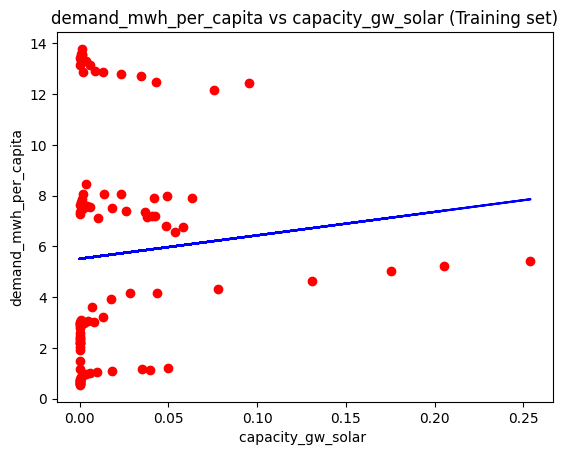

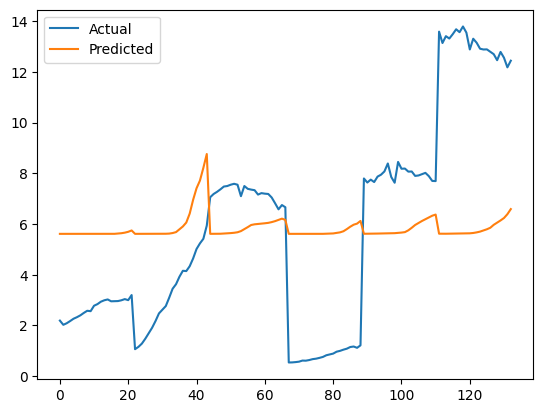

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split



# Extract input and target variables
X = dataset.iloc[:, 4].values  # independent variable array
y = dataset.iloc[:, 2].values  # dependent variable vector

# Reshape input variable array into two-dimensional array with one column
X = X.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state=0)

# Create and fit linear regression model to training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on test data
y_pred = regressor.predict(X_test)

print("Coefficients: \n",  regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.7f" % r2_score(y_test, y_pred))

# Print the coefficients (slopes) and intercept of the linear regression equation

print("Intercept:", regressor.intercept_)

# Visualize training data and regression line
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("demand_mwh_per_capita vs capacity_gw_solar (Training set)")
plt.ylabel("demand_mwh_per_capita")
plt.xlabel("capacity_gw_solar ")
plt.show()

# Normalize input data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Train linear regression model on normalized data
model = LinearRegression()
model.fit(X_normalized, y)

# Make predictions on all data points
predicted_y = model.predict(X_normalized)

# Visualize actual vs predicted values
plt.plot(y, label='Actual')
plt.plot(predicted_y, label='Predicted')
plt.legend()
plt.show()



*   The first visualization shows the actual demand vs the generation of solar energy for the training set, along with the regression line. This helps to visualize how well the model fits the training data.
*  The second visualization shows the actual demand vs predicted demand for all data points. This helps to visualize how well the model generalizes to new data, and whether there are any patterns or trends in the model's errors.





Coefficients: 
 [7.34307749]
Mean squared error: 28758.33
Mean absolute error: 121.18
Coefficient of determination: -0.0014168
Intercept: 461.382571568998


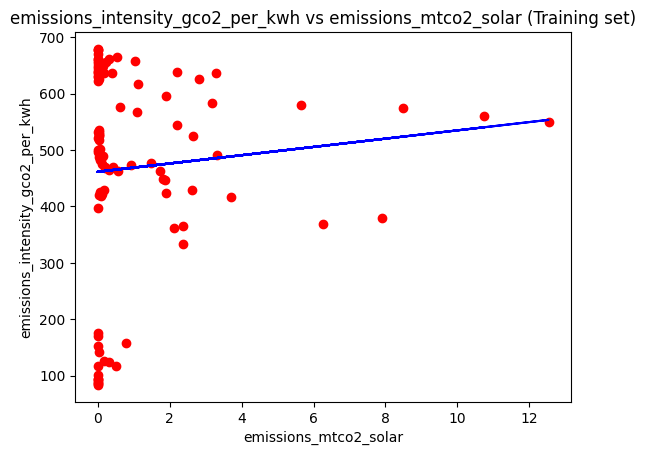

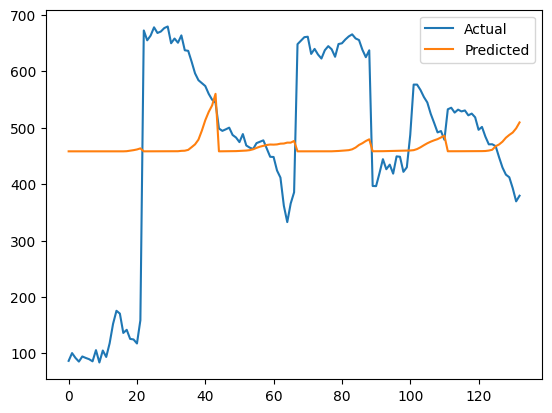

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



# Extract input and target variables
X = dataset.iloc[:, 11].values  # independent variable array
y = dataset.iloc[:, 3].values  # dependent variable vector

# Reshape input variable array into two-dimensional array with one column
X = X.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state=0)

# Create and fit linear regression model to training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on test data
y_pred = regressor.predict(X_test)

print("Coefficients: \n",  regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.7f" % r2_score(y_test, y_pred))

# Print the coefficients (slopes) and intercept of the linear regression equation

print("Intercept:", regressor.intercept_)

# Visualize training data and regression line
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("emissions_intensity_gco2_per_kwh vs emissions_mtco2_solar (Training set)")
plt.ylabel("emissions_intensity_gco2_per_kwh")
plt.xlabel("emissions_mtco2_solar")
plt.show()

# Normalize input data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Train linear regression model on normalized data
model = LinearRegression()
model.fit(X_normalized, y)

# Make predictions on all data points
predicted_y = model.predict(X_normalized)

# Visualize actual vs predicted values
plt.plot(y, label='Actual')
plt.plot(predicted_y, label='Predicted')
plt.legend()
plt.show()

Coefficients: 
 [0.01181942]
Mean squared error: 12.36
Mean absolute error: 3.06
Coefficient of determination: 0.0397121
Coefficients: [0.01181942]
Intercept: 5.431763823074437


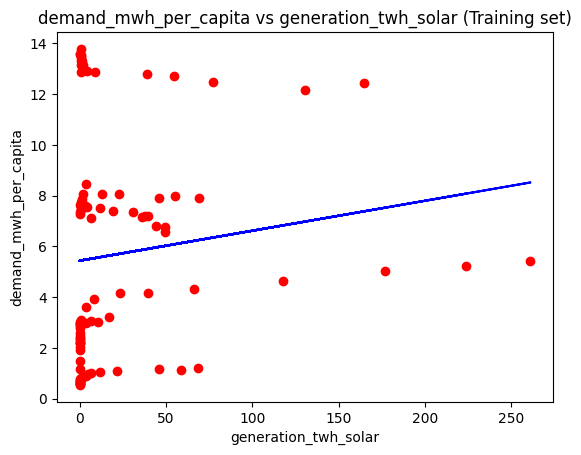

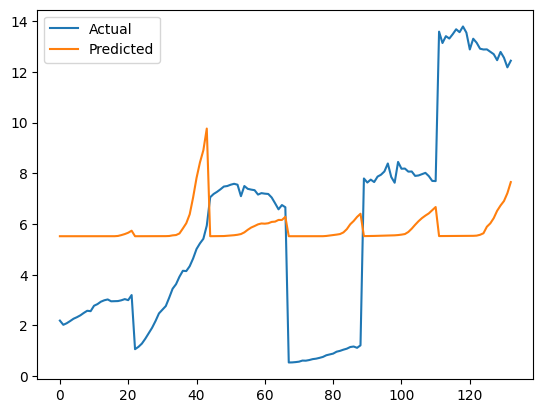

In [ ]:
# Extract input and target variables
X = dataset.iloc[:, 17].values  # independent variable array
y = dataset.iloc[:, 2].values  # dependent variable vector

# Reshape input variable array into two-dimensional array with one column
X = X.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state=0)

# Create and fit linear regression model to training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on test data
y_pred = regressor.predict(X_test)

print("Coefficients: \n",  regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.7f" % r2_score(y_test, y_pred))

# Print the coefficients (slopes) and intercept of the linear regression equation
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Visualize training data and regression line
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("demand_mwh_per_capita vs generation_twh_solar (Training set)")
plt.ylabel("demand_mwh_per_capita")
plt.xlabel("generation_twh_solar")
plt.show()

# Normalize input data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Train linear regression model on normalized data
model = LinearRegression()
model.fit(X_normalized, y)

# Make predictions on all data points
predicted_y = model.predict(X_normalized)

# Visualize actual vs predicted values
plt.plot(y, label='Actual')
plt.plot(predicted_y, label='Predicted')
plt.legend()
plt.show()

##Wind

Coefficients: 
 [13.65800602]
Mean squared error: 12.73
Mean absolute error: 3.18
Coefficient of determination: 0.0111675
Intercept: 5.249202889404688


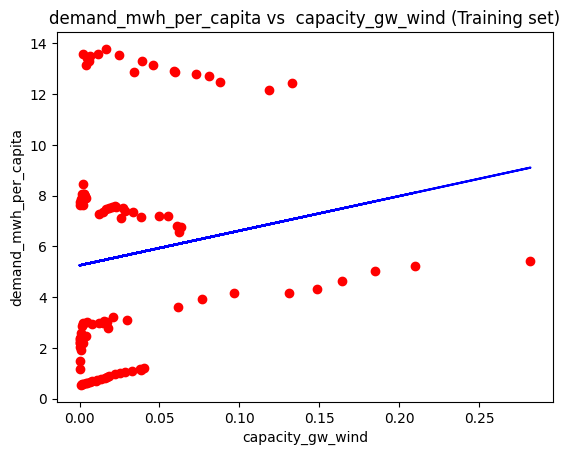

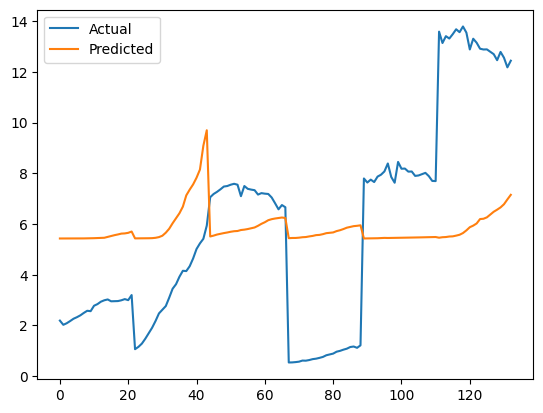

In [ ]:
# Extract input and target variables
X = dataset.iloc[:, 5].values  # independent variable array
y = dataset.iloc[:, 2].values  # dependent variable vector

# Reshape input variable array into two-dimensional array with one column
X = X.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state=0)

# Create and fit linear regression model to training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on test data
y_pred = regressor.predict(X_test)

print("Coefficients: \n",  regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.7f" % r2_score(y_test, y_pred))

# Print the coefficients (slopes) and intercept of the linear regression equation

print("Intercept:", regressor.intercept_)

# Visualize training data and regression line
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("demand_mwh_per_capita vs  capacity_gw_wind (Training set)")
plt.ylabel("demand_mwh_per_capita")
plt.xlabel("capacity_gw_wind")
plt.show()

# Normalize input data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Train linear regression model on normalized data
model = LinearRegression()
model.fit(X_normalized, y)

# Make predictions on all data points
predicted_y = model.predict(X_normalized)

# Visualize actual vs predicted values
plt.plot(y, label='Actual')
plt.plot(predicted_y, label='Predicted')
plt.legend()
plt.show()

Coefficients: 
 [1.03350288]
Mean squared error: 12.36
Mean absolute error: 3.16
Coefficient of determination: 0.0402946
Intercept: 4.9519752923947244


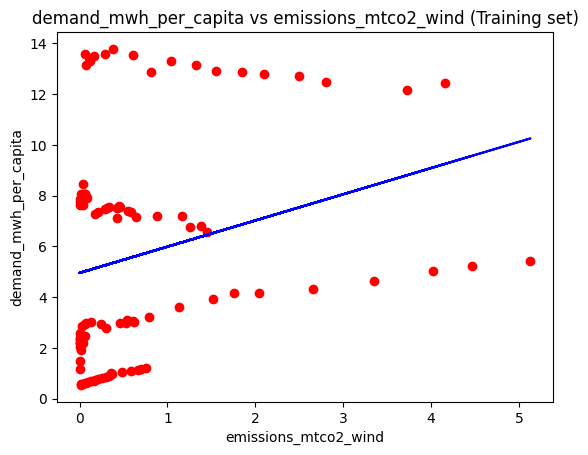

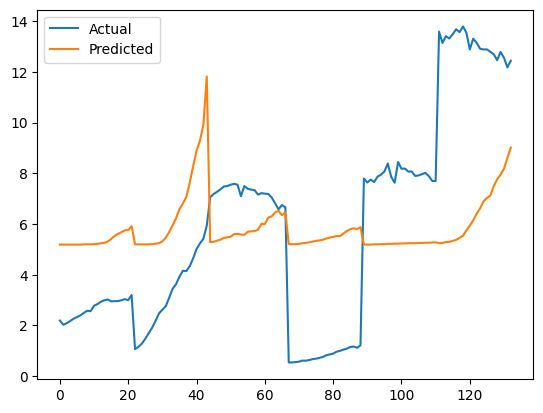

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



# Extract input and target variables
X = dataset.iloc[:, 10].values  # independent variable array
y = dataset.iloc[:, 2].values  # dependent variable vector

# Reshape input variable array into two-dimensional array with one column
X = X.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state=0)

# Create and fit linear regression model to training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on test data
y_pred = regressor.predict(X_test)

print("Coefficients: \n",  regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.7f" % r2_score(y_test, y_pred))

# Print the coefficients (slopes) and intercept of the linear regression equation

print("Intercept:", regressor.intercept_)

# Visualize training data and regression line
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("demand_mwh_per_capita vs emissions_mtco2_wind (Training set)")
plt.ylabel("demand_mwh_per_capita")
plt.xlabel("emissions_mtco2_wind")
plt.show()

# Normalize input data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Train linear regression model on normalized data
model = LinearRegression()
model.fit(X_normalized, y)

# Make predictions on all data points
predicted_y = model.predict(X_normalized)

# Visualize actual vs predicted values
plt.plot(y, label='Actual')
plt.plot(predicted_y, label='Predicted')
plt.legend()
plt.show()

Coefficients: 
 [0.01137575]
Mean squared error: 12.36
Mean absolute error: 3.16
Coefficient of determination: 0.0399725
Intercept: 4.951030430848093


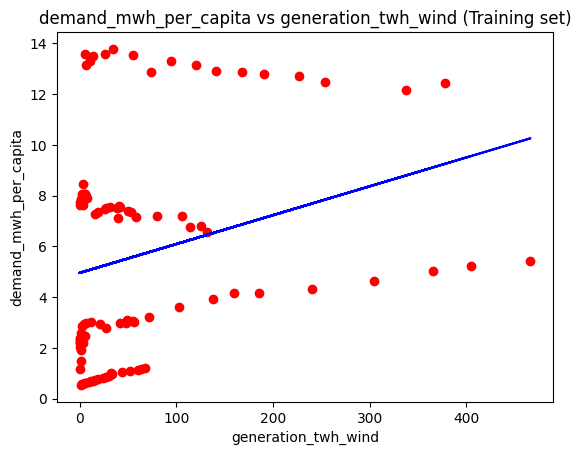

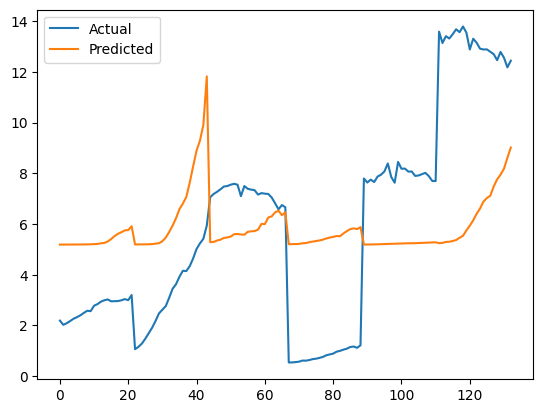

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



# Extract input and target variables
X = dataset.iloc[:, 16].values  # independent variable array
y = dataset.iloc[:, 2].values  # dependent variable vector

# Reshape input variable array into two-dimensional array with one column
X = X.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state=0)

# Create and fit linear regression model to training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on test data
y_pred = regressor.predict(X_test)

print("Coefficients: \n",  regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.7f" % r2_score(y_test, y_pred))

# Print the coefficients (slopes) and intercept of the linear regression equation

print("Intercept:", regressor.intercept_)

# Visualize training data and regression line
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("demand_mwh_per_capita vs generation_twh_wind (Training set)")
plt.ylabel("demand_mwh_per_capita")
plt.xlabel("generation_twh_wind")
plt.show()

# Normalize input data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Train linear regression model on normalized data
model = LinearRegression()
model.fit(X_normalized, y)

# Make predictions on all data points
predicted_y = model.predict(X_normalized)

# Visualize actual vs predicted values
plt.plot(y, label='Actual')
plt.plot(predicted_y, label='Predicted')
plt.legend()
plt.show()